# Zadanie 13


## Przygotowywania do zadania 

### Wczytywanie potrzebnych bibliotek

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


### Ustawianie globalnych danych

Ustawiam tutaj, dane które są uniwersalne dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [2]:
np.random.seed(123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
parametry = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 3000
# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

## Badanie 

### Potrzebne funkcje 

Tutaj stworzę wszystkie funkcje, które wykorzystam do badania, przy okazji opisując od razu ich działanie. Następnie przy symulacji badania, będą one tylko wywoływane. Funkcje zaczynają się od najbardziej ogólnej i idą w dół razem z programem(idziemy po kolei tak samo jak program).

#### Funkcja obliczania mocy testu 

Najogólniejsza funkcja, która przygotuje dane, które wykorzystam, aby zrobić symulacje w funkcji symulacja. Więc ustalamy liczbę danych oraz stopień swobody i idziemy dalej przekazując parametry dalej do funkcji. Po symulacji dodajemy wynik do tablicy i idziemy dalej. Od razu wybieram czy to będzie klasyczny sposób testowania czy z wykorzystaniem PIT. 

Argumenty: 
- test - Mówi który rozkład jest teraz symulowany

Funkcja będzie zwracać tablice 2D(i,j), która zbierała dane dla i-tej liczbie danych oraz j-tych stopni swobody.



In [3]:
def obliczanie_mocy_testu(test):
    # Tablica, która zbierze mi moce testów, które zwróci
    moce_testow = []

    # Dla każdej liczby z liczby_danych
    for l_danych in liczby_danych:
        """
        Tworzę nową tablicę która przechowuję wyniki mocu testu dla i-tej liczby danych. Lista przechowuje wyniki dla każdego j-stopnia
        swoobody w stopnie_swobody. Wykorzystuje List Comprahension, żeby umilic kod
        """
        moce_testow.append([symulacja(l_danych,p,test) for p in parametry])



    # Zwracam w.w tablice
    return moce_testow

#### Funkcja symulacji 

Ustaliliśmy już liczbę danych oraz liczbe stopni swobody dla naszych danych. 
W tej funkcji będziemy generować dane z rozkładu t-studenta dokładnie z tymi parametrami, przekazanymi jako argumenty. 
Następnie prześlemy je do funkcji, która wybierze, który test jest obecnie symulowany i wynik tej funkcji będziemy sumować w zmiennej 
suma_odrzucen_H0.

Argumenty:
- l_danych - Ile danych będziemy losować z rozkładu 
- par - parametetr danego rozkladu
- test - Jaki rozklad jest teraz symulowany


Funkcja będzie zwracać odsetek w jakim odrzuciłem hipotezę zerową dla podanych parametrów

In [4]:
def rozklad(test,par,l_danych):
    if test == 'lap':
        return stats.laplace_asymmetric.rvs(par,size=l_danych)
    
    return stats.rayleigh.rvs(par,size=l_danych)

def symulacja(l_danych,par,test):
    # W tej zmiennej będę sumował ile razy odrzuciłem hipotezę zerową dla danego zestawu 
    suma_odrzucenia_H0 = 0

    # Tutaj będzie symulacja
    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z podanego rozkladu
        probka = rozklad(test,par,l_danych)

        # Następnie przekazuje wszystkie dane, aby wybrac który test jest symulowany i dowiedzieć się jaki jest wynik testu
        suma_odrzucenia_H0 += wybor_testu(probka,test,par)

    # Zwracam odsetek odrzucenia hipotezy zerowej
    return suma_odrzucenia_H0/liczba_symulacji

#### Funkcja wyboru testu 

Funkcja za argumenty przyjmuje wszystkie dane, które są jej potrzebne do wybrania oraz przeprowadzenia danego testu. 


Funkcja będzie zwracać 1 lub 0 w zależności od wyniku testu(1-odrzucamy test, 0-nie ma podstaw)

In [5]:

def wybor_testu(probka,test,par):
    """
    Ogólna zasada działania testów:
    
    Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
    Hipoteze zerowa co znaczy ze zwracamy wartość 1. W przeciwnym wypadku zwracamy 0
    
    """

    pval = None
    if test == 'lap':
        pval = stats.kstest(probka,'laplace_asymmetric',args=(par,)).pvalue
    
    else:
        pval = stats.kstest(probka,'rayleigh',args=(par,)).pvalue
    
    if pval < poziom_istotnosci: return 1
    
    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
            


## Symulacje 

### Klasyczny sposób testowanaia

In [ ]:
moc_kol_lap = obliczanie_mocy_testu('lap')
moc_kol_reh = obliczanie_mocy_testu('reh')


## Wnioski 

### Test Kołgomorowa

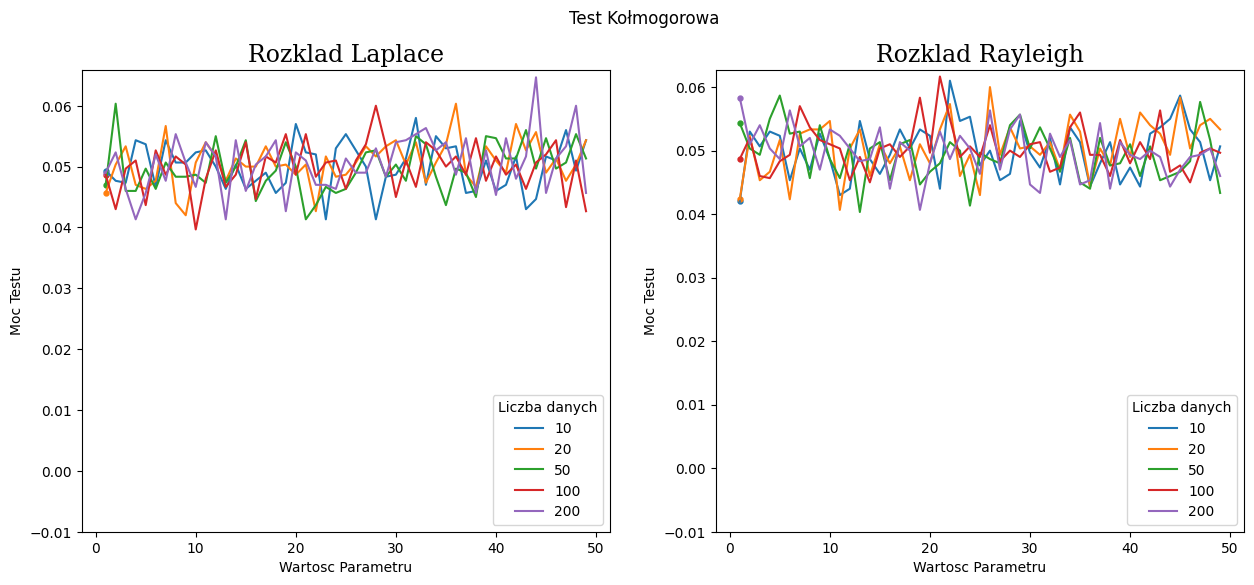

In [9]:
fig, (kol,kol_pit) = plt.subplots(1,2, figsize=(15,6))  # 1 row, 2 columns

# Dodaje dane do wykres
for i,moc in enumerate(moc_kol_lap):
    kol.plot(parametry,moc,label= str(liczby_danych[i]))
    kol.scatter(parametry[0], moc[0], s=50, marker='.') 

for i,moc in enumerate(moc_kol_reh):
    kol_pit.plot(parametry,moc,label= str(liczby_danych[i]))
    kol_pit.scatter(parametry[0], moc[0], s=50, marker='.') 

fig.suptitle("Test Kołmogorowa")
# Dodaje opisy do wykresu test kolgomorowa
kol.set_xlabel("Wartosc Parametru")
kol.set_ylabel("Moc Testu")
kol.set_title("Rozklad Laplace",fontdict=font_title)
kol.legend(title="Liczba danych",loc="lower right")
kol.set_ylim(-0.01)

# Dodaje opisy do wykresu 
kol_pit.set_xlabel("Wartosc Parametru")
kol_pit.set_ylabel("Moc Testu")
kol_pit.set_title("Rozklad Rayleigh",fontdict=font_title)
kol_pit.legend(title="Liczba danych",loc="lower right")
kol_pit.set_ylim(-0.01)


# plt.tight_layout()
plt.show()


### Wnioski

Jak możemy zauważyć na wykresie test kołgomorowa jest bardzo dokładny. Rozkłady są asymetryczne, test Kołmogorowa krazy wokol poziomu istotnosci, co jest pozadana czynnoscia! Parametry rozkladow nie mialy znaczenia